# Assignment: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded CERES dataset is available here: doi:10.5281/zenodo.13983633.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

Next, download the NetCDF file using pooch.

In [2]:
import pooch

file = pooch.retrieve(
    url = "https://zenodo.org/records/13983633/files/CERES_EBAF-TOA_%20Ed2p8.nc?download=1",
    known_hash=None,
    fname= 'CERES_EBAF-TOA_ Ed2p8.nc',
    processor=None
)

## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents 
You may need to set `decode_times=False`.

In [3]:
dataset = xr.open_dataset(file, decode_times=False)
dataset

<xarray.Dataset> Size: 474MB
Dimensions:          (lat: 180, lon: 360, time: 183)
Coordinates:
  * lat              (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon              (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time             (time) float32 732B 482.5 483.5 484.5 ... 662.5 663.5 664.5
Data variables:
    solar_mon        (time, lat, lon) float32 47MB ...
    toa_cre_lw_mon   (time, lat, lon) float32 47MB ...
    toa_cre_net_mon  (time, lat, lon) float32 47MB ...
    toa_cre_sw_mon   (time, lat, lon) float32 47MB ...
    toa_lw_all_mon   (time, lat, lon) float32 47MB ...
    toa_lw_clr_mon   (time, lat, lon) float32 47MB ...
    toa_net_all_mon  (time, lat, lon) float32 47MB ...
    toa_net_clr_mon  (time, lat, lon) float32 47MB ...
    toa_sw_all_mon   (time, lat, lon) float32 47MB ...
    toa_sw_clr_mon   (time, lat, lon) float32 47MB ...
Attributes:
    references:   Loeb_etal2009
    version:      This is version 2.8: August 21, 2015
    comment:      Data is from East to West and South to North. Climatology f...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    description:  Edition 2.8
    Fill_Value:   Fill Value is -999.0

### 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [4]:
ds_long_name = max(len(var) for var in dataset.variables)
print(f"{'[Variable]':<{ds_long_name}} : [Long name]")

for var in dataset:
    try:
        long_name = dataset[var].attrs['long_name']
        print(f"{var:<{ds_long_name}} : {long_name}")
    except KeyError:
        print(f"{var:<{ds_long_name}} : <no long_name attribute>")


[Variable]      : [Long name]
solar_mon       : Incoming Solar Flux, Monthly Means
toa_cre_lw_mon  : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
toa_cre_sw_mon  : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_lw_all_mon  : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_lw_clr_mon  : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_all_mon : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_net_clr_mon : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_sw_all_mon  : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon  : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions


## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset

In [23]:
ds_time_mean = dataset.mean(dim='time')
ds_time_mean

<xarray.Dataset> Size: 3MB
Dimensions:          (lat: 180, lon: 360)
Coordinates:
  * lat              (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon              (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    solar_mon        (lat, lon) float32 259kB 170.0 170.0 170.0 ... 172.2 172.2
    toa_cre_lw_mon   (lat, lon) float32 259kB -0.5136 -0.5136 ... 7.667 7.667
    toa_cre_net_mon  (lat, lon) float32 259kB -2.488 -2.49 ... -5.755 -5.755
    toa_cre_sw_mon   (lat, lon) float32 259kB -1.974 -1.976 ... -13.42 -13.42
    toa_lw_all_mon   (lat, lon) float32 259kB 140.8 140.8 140.8 ... 193.4 193.4
    toa_lw_clr_mon   (lat, lon) float32 259kB 140.3 140.3 140.3 ... 201.0 201.0
    toa_net_all_mon  (lat, lon) float32 259kB -91.41 -91.41 ... -125.2 -125.2
    toa_net_clr_mon  (lat, lon) float32 259kB -88.92 -88.92 ... -119.5 -119.5
    toa_sw_all_mon   (lat, lon) float32 259kB 120.6 120.6 120.6 ... 104.0 104.0
    toa_sw_clr_mon   (lat, lon) float32 259kB 118.6 118.6 118.6 ... 90.6 90.6

In [26]:
print("Time-mean values:")
for var in ds_time_mean:
    if var not in ['lat', 'lon']:
        print(f"{var:<15}: {ds_time_mean[var].shape}")

Time-mean values:
solar_mon      : (180, 360)
toa_cre_lw_mon : (180, 360)
toa_cre_net_mon: (180, 360)
toa_cre_sw_mon : (180, 360)
toa_lw_all_mon : (180, 360)
toa_lw_clr_mon : (180, 360)
toa_net_all_mon: (180, 360)
toa_net_clr_mon: (180, 360)
toa_sw_all_mon : (180, 360)
toa_sw_clr_mon : (180, 360)


### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use "All-Sky" conditions)

Note the sign conventions on each variable.

In [27]:
#Incoming Solar Radiation (solar_mon): +
#TOA Outgoing Longwave (toa_lw_all_mon): -
#TOA Outgoing Shortwave (toa_sw_all_mon): -
#Red means high volume of radiation, and blue means low level.

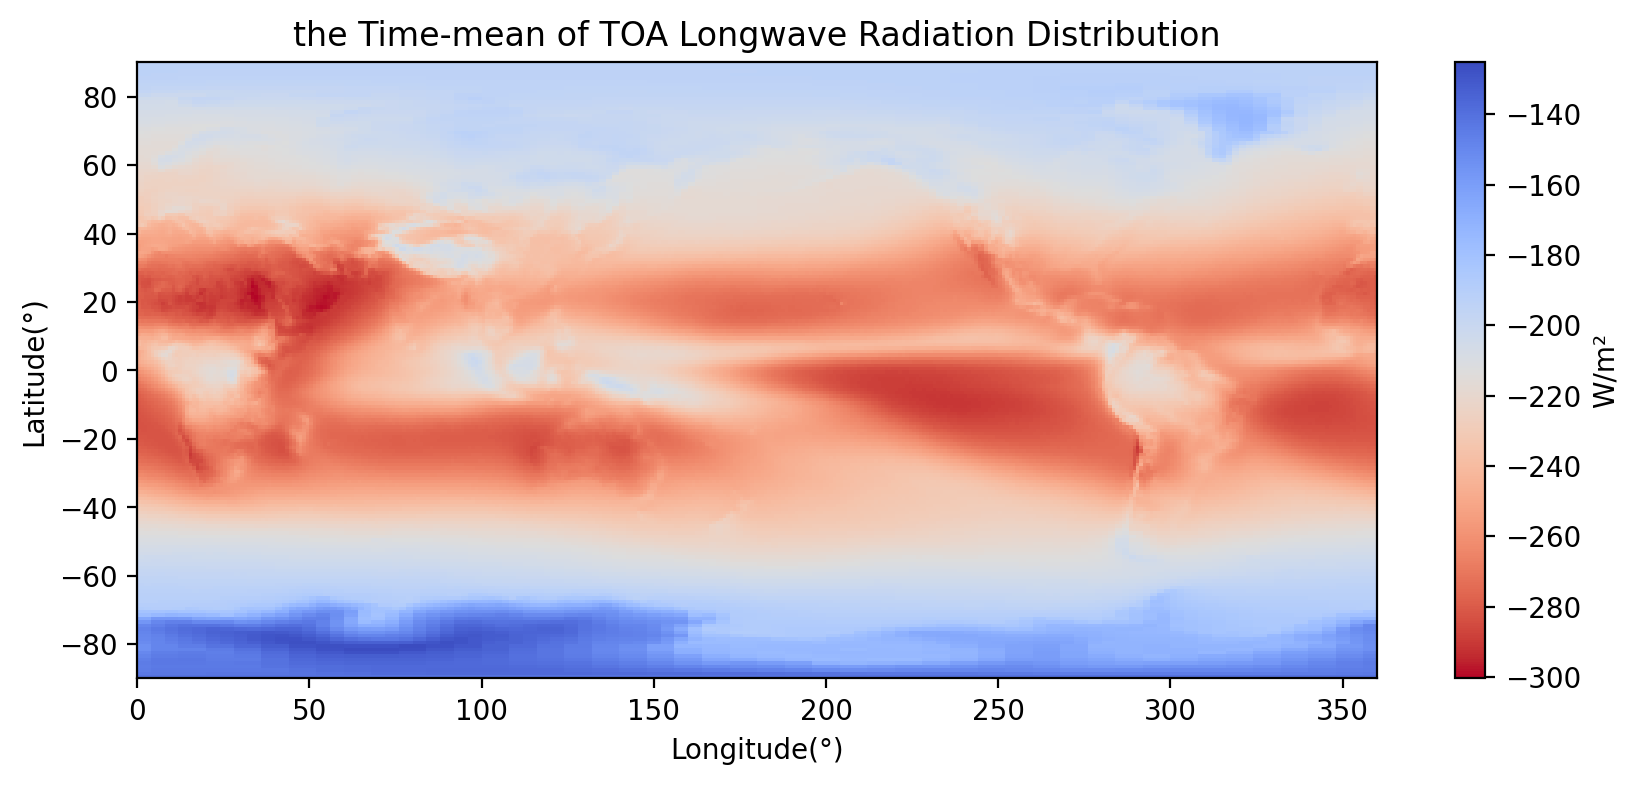

In [28]:
(-ds_time_mean.toa_lw_all_mon).plot(
    figsize=(10, 4),
    cmap='coolwarm_r',
    cbar_kwargs={'label': 'W/m²'}
)
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
plt.title('the Time-mean of TOA Longwave Radiation Distribution')
plt.show()

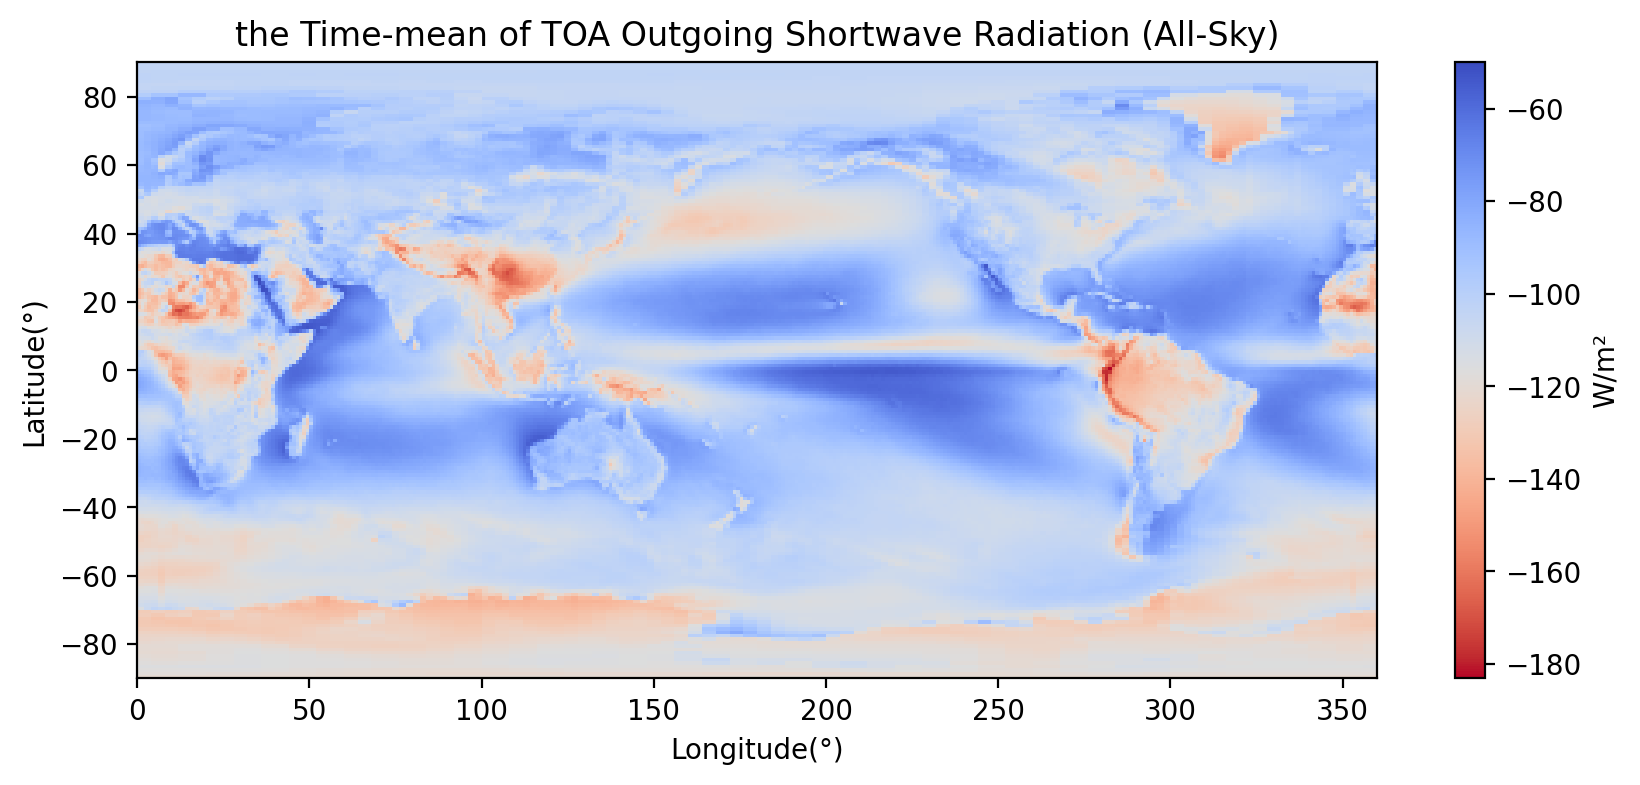

In [29]:
(-ds_time_mean.toa_sw_all_mon).plot(
    figsize=(10, 4),
    cmap='coolwarm_r',
    cbar_kwargs={'label': 'W/m²'}
)
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
plt.title('the Time-mean of TOA Outgoing Shortwave Radiation (All-Sky)')
plt.show()

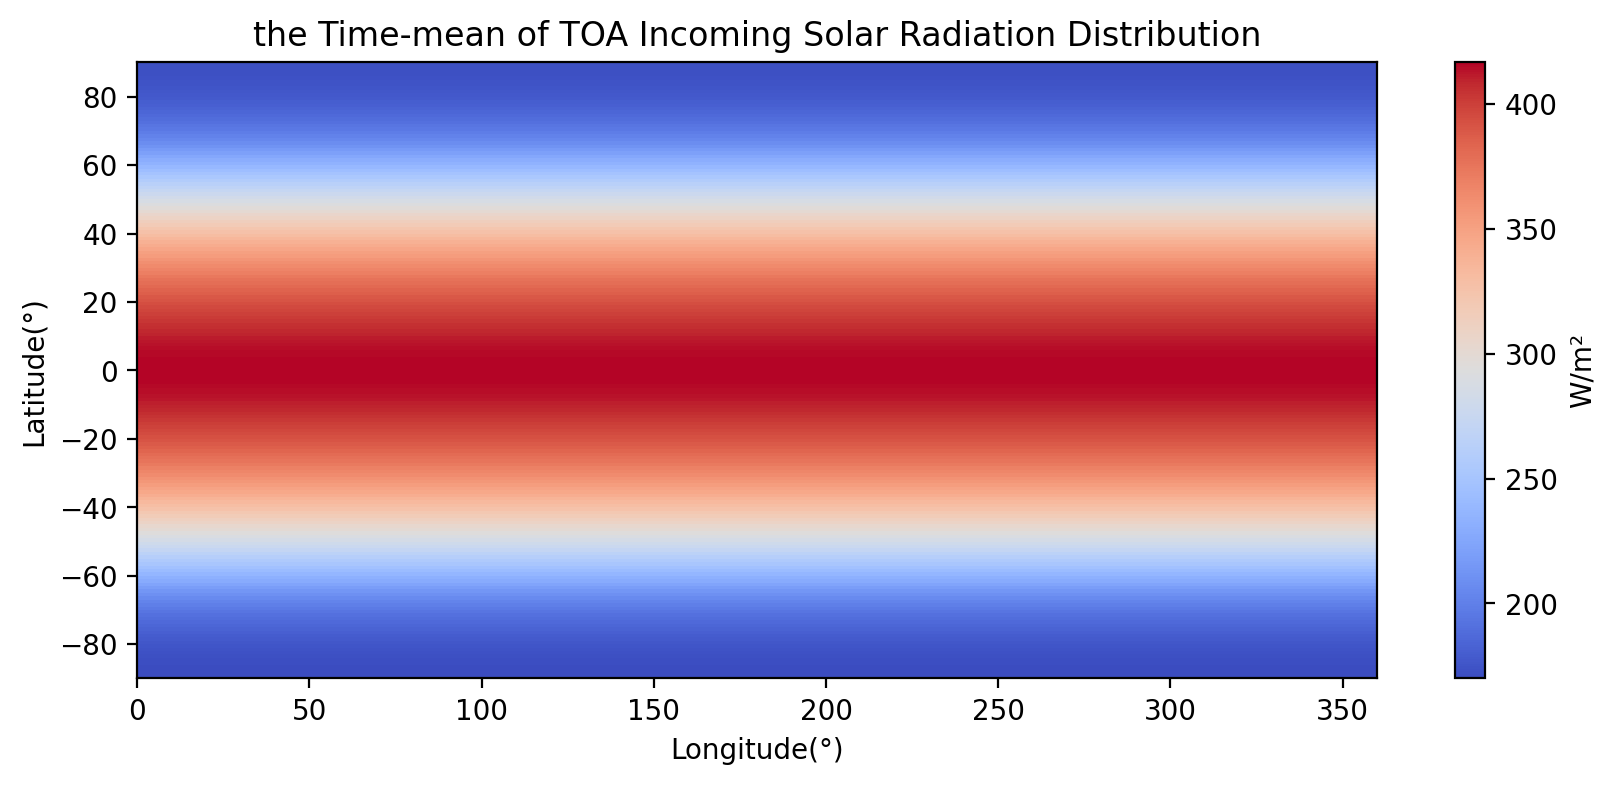

In [30]:
#solar_mon
ds_time_mean.solar_mon.plot(
    figsize=(10, 4),
    cmap='coolwarm',
    cbar_kwargs={'label': 'W/m²'}
)
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
plt.title('the Time-mean of TOA Incoming Solar Radiation Distribution') #the total solar radiation is distributed evenly at same Latitude
plt.show()

### 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

In [31]:
TOA_net_flux = (ds_time_mean.solar_mon - ds_time_mean.toa_lw_all_mon - ds_time_mean.toa_sw_all_mon)


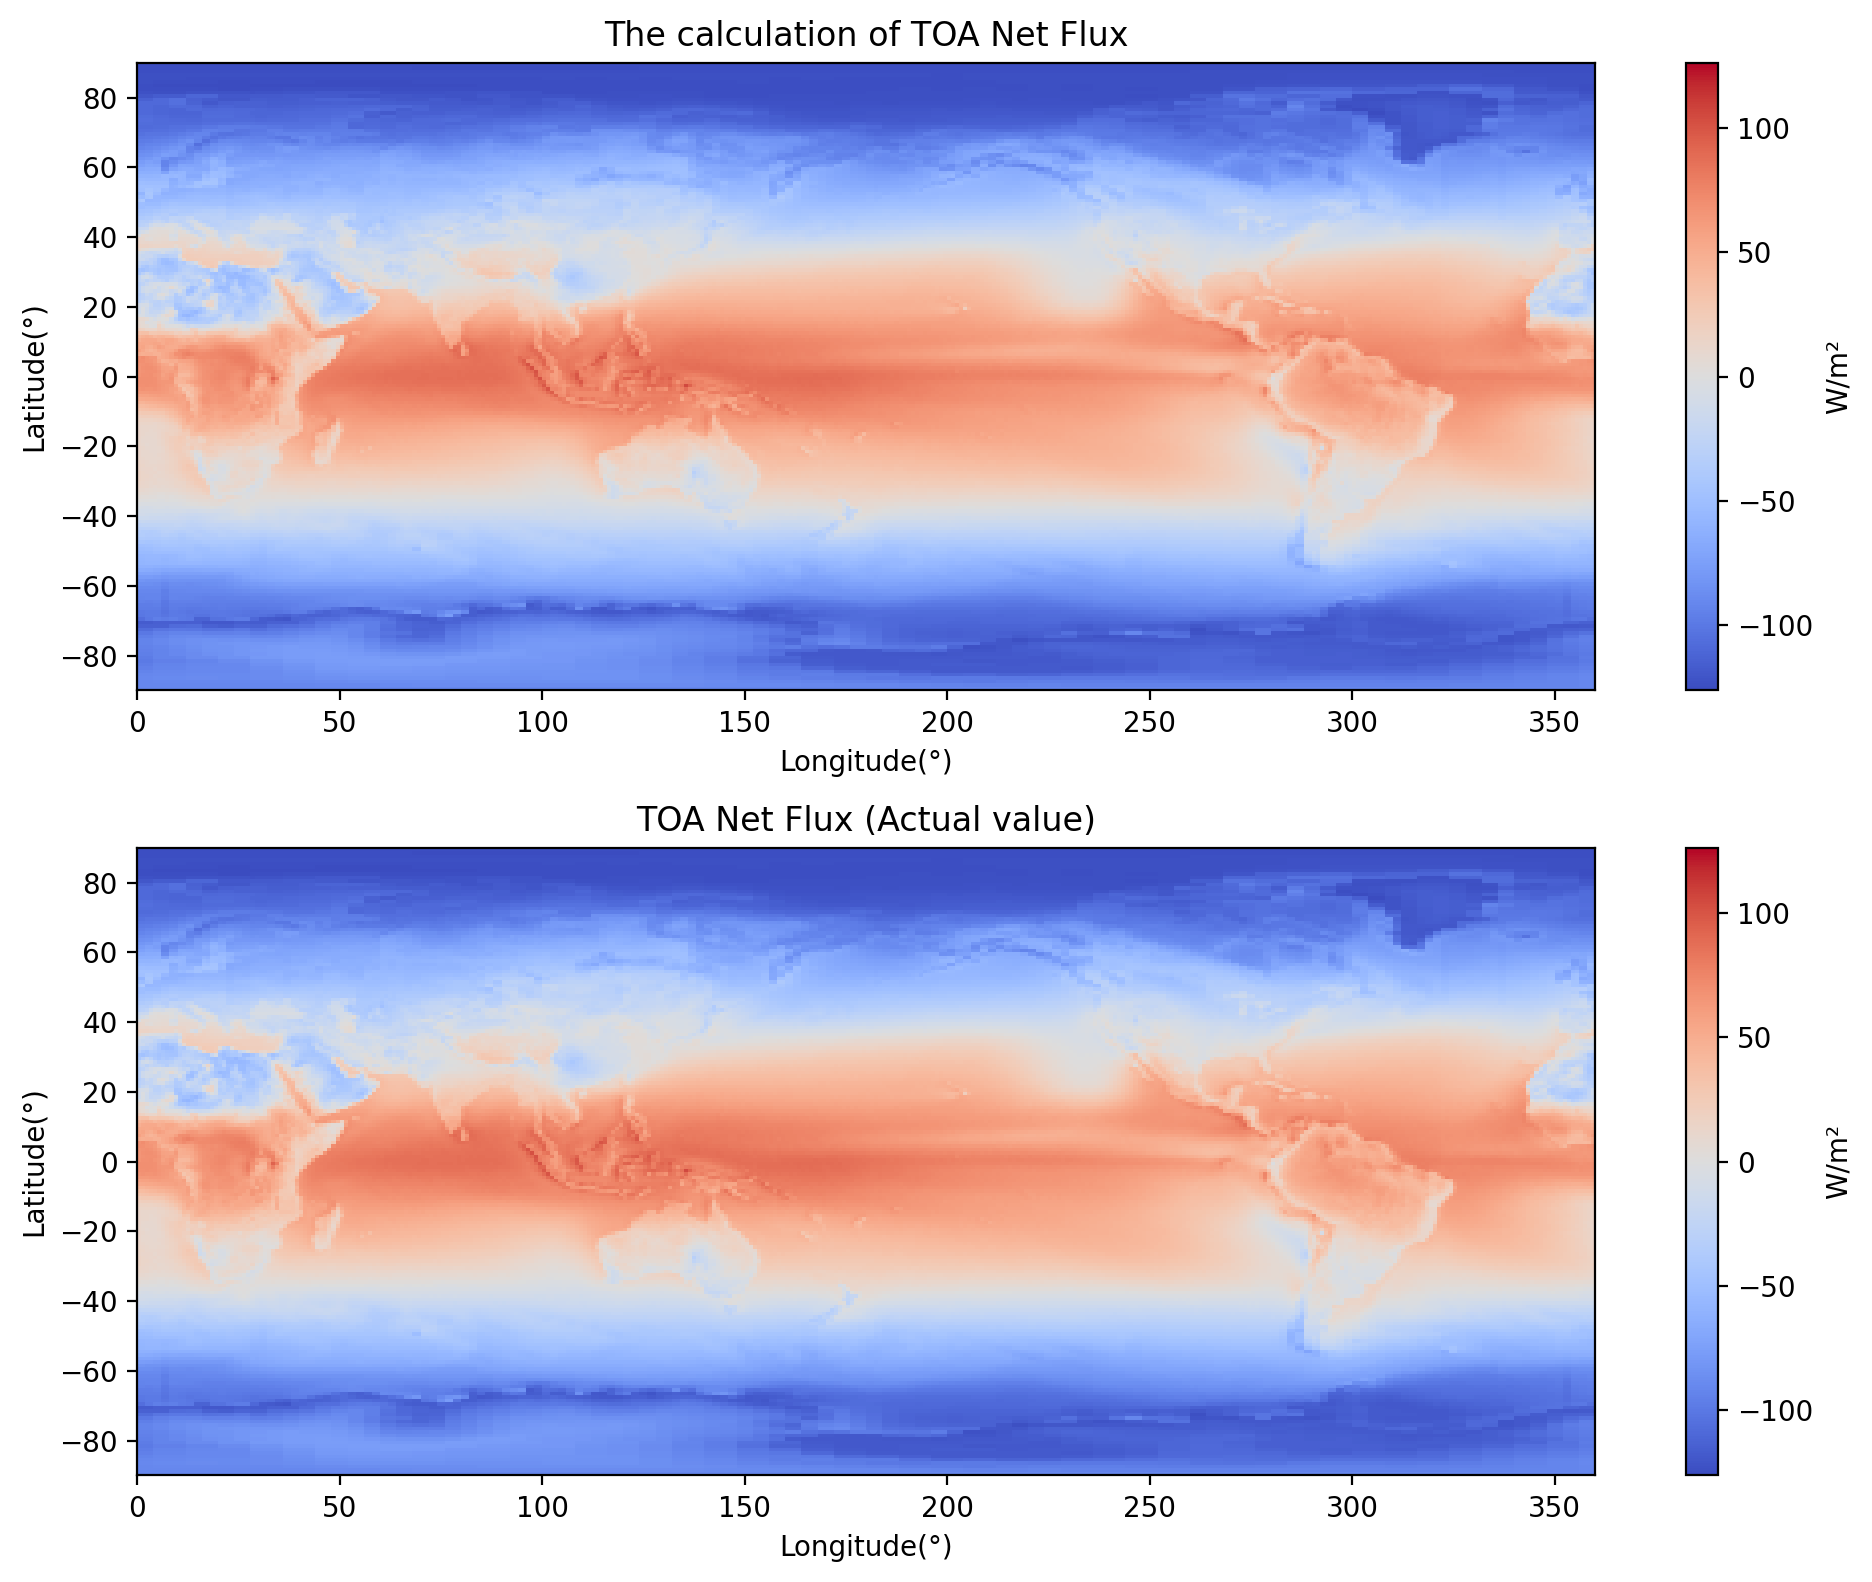

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax0, ax1 = axes

TOA_net_flux.plot(ax=ax0, cmap='coolwarm', cbar_kwargs={'label': 'W/m²'})

ax0.set_xlabel('Longitude(°)')
ax0.set_ylabel('Latitude(°)')
ax0.set_title('The calculation of TOA Net Flux')

# the net flux variable
ds_time_mean.toa_net_all_mon.plot(ax=ax1, cmap='coolwarm', cbar_kwargs={'label': 'W/m²'}
)
ax1.set_xlabel('Longitude(°)')
ax1.set_ylabel('Latitude(°)')
ax1.set_title('TOA Net Flux (Actual value)')
plt.tight_layout()
plt.show()

#Based on the visual display, there are same numbers.

## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [33]:
unweighted_mean = ds_time_mean.toa_net_all_mon.mean().values
print(f"Unweighted global mean: {unweighted_mean:.2f} W/m²")

Unweighted global mean: -28.62 W/m²


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\phi)$. ($\phi$ is latitude)

### 3.2) Create a `weight` array proportional to $\cos(\phi)$

Think carefully a about radians vs. degrees


In [34]:
#latitude value:
print("Latitude values:", ds_time_mean.lat.values[:])

Latitude values: [-89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5
 -77.5 -76.5 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5
 -65.5 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5
 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5
 -41.5 -40.5 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5
 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5
 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5
  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5
   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5
  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5
  30.5  31.5  32.5  33.5  34.5  35.5  36.5  37.5  38.5  39.5  40.5  41.5
  42.5  43.5  44.5  45.5  46.5  47.5  48.5  49.5  50.5  51.5  52.5  53.5
  54.5  55.5  56.5  57.5  58.5  59.5  60.5  61.5  62.5  63.5  64.5  65.5
  66.5  67.5  68.5  69.5  70.5  71

In [35]:
#convert latitude to radians, weight using cos
lat_rad = np.deg2rad(ds_time_mean.lat)
weights = np.cos(lat_rad)
weights

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([0.00872656, 0.02617699, 0.04361945, 0.06104851, 0.07845908,
       0.09584576, 0.11320324, 0.13052624, 0.14780948, 0.16504757,
       0.18223551, 0.19936794, 0.21643965, 0.23344542, 0.25037998,
       0.26723838, 0.28401536, 0.30070582, 0.3173047 , 0.33380693,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.4146933 ,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.5075384 , 0.5224986 , 0.5372996 , 0.551937  , 0.56640625,
       0.58070296, 0.59482276, 0.6087614 , 0.62251467, 0.6360782 ,
       0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.83388585, 0.8241262 ,
       0.8141155 , 0.8038569 , 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.64944804,
       0.6360782 , 0.62251467, 0.6087614 , 0.59482276, 0.58070296,
       0.56640625, 0.551937  , 0.5372996 , 0.5224986 , 0.5075384 ,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.4146933 , 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.33380693, 0.3173047 , 0.30070582, 0.28401536, 0.26723838,
       0.25037998, 0.23344542, 0.21643965, 0.19936794, 0.18223551,
       0.16504757, 0.14780948, 0.13052624, 0.11320324, 0.09584576,
       0.07845908, 0.06104851, 0.04361945, 0.02617699, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    pointwidth:     1.0
    standard_name:  latitude
    gridtype:       0
    units:          degree_north

### 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Use xarray's [weighted array reductions](http://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) to compute the weighted mean.

In [36]:
weighted_mean = ds_time_mean.toa_net_all_mon.weighted(weights).mean()
print(f"Area-weighted global mean TOA net radiation: {weighted_mean.values:.2f} W/m²")
print(f"Unweighted global mean: {unweighted_mean:.2f} W/m²")

Area-weighted global mean TOA net radiation: 0.87 W/m²
Unweighted global mean: -28.62 W/m²


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this? 

### 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [37]:
solar_mean = ds_time_mean.solar_mon.weighted(weights).mean()
lw_mean = ds_time_mean.toa_lw_all_mon.weighted(weights).mean()
sw_mean = ds_time_mean.toa_sw_all_mon.weighted(weights).mean()
print("Comparing:")
print(f"Incoming solar:    {solar_mean.values:.1f} W/m² (NASA: 340.4 W/m²)")
print(f"Outgoing LW:       {lw_mean.values:.1f} W/m² (NASA: 239.9 W/m²)")
print(f"Reflected SW:      {sw_mean.values:.1f} W/m² (NASA: 99.9 W/m²)")

net_mean = solar_mean - lw_mean - sw_mean
print(f"Net TOA flux:      {net_mean.values:.1f} W/m² (NASA: 0.6 W/m²)")

Comparing:
Incoming solar:    340.1 W/m² (NASA: 340.4 W/m²)
Outgoing LW:       239.7 W/m² (NASA: 239.9 W/m²)
Reflected SW:      99.6 W/m² (NASA: 99.9 W/m²)
Net TOA flux:      0.9 W/m² (NASA: 0.6 W/m²)


## 4) Meridional Heat Transport Calculation

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\phi) d\lambda d \phi $$

where $d\lambda$ and $d\phi$ are the spacing of the points in longitude and latitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [38]:
#convert to radians
R = 6371
#d lambda = spacing longitude, d pi = spacing latitude
dlat = np.deg2rad(np.abs(ds_time_mean.lat[1] - ds_time_mean.lat[0])) #d pi
dlon = np.deg2rad(np.abs(ds_time_mean.lon[1] - ds_time_mean.lon[0])) #d lamda
# cos(pi) = lat_rad in 3.2
#so the grid:
print(f"Grid spacing: {np.rad2deg(dlat):.2f}° latitude × {np.rad2deg(dlon):.2f}° longitude")

Grid spacing: 1.00° latitude × 1.00° longitude


In [39]:
#based on this function:
pixel_areas = R * R * np.cos(lat_rad) * dlon * dlat 

In [40]:
equator_index = len(pixel_areas)//2
mid_lat_index = len(pixel_areas)//4
pole_index = 0
print("\nPixel areas at different latitudes:")
print("Mid latitude:", float(pixel_areas[mid_lat_index]), "km²")
print("Near pole:", float(pixel_areas[pole_index]), "km²")
print("Near equator:", float(pixel_areas[equator_index]),  "km²")


Pixel areas at different latitudes:
Mid latitude: 8818.8505859375 km²
Near pole: 107.8979263305664 km²
Near equator: 12363.841796875 km²



### 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (m$^2$) from above with the radiative flux (W m$^{-2}$) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

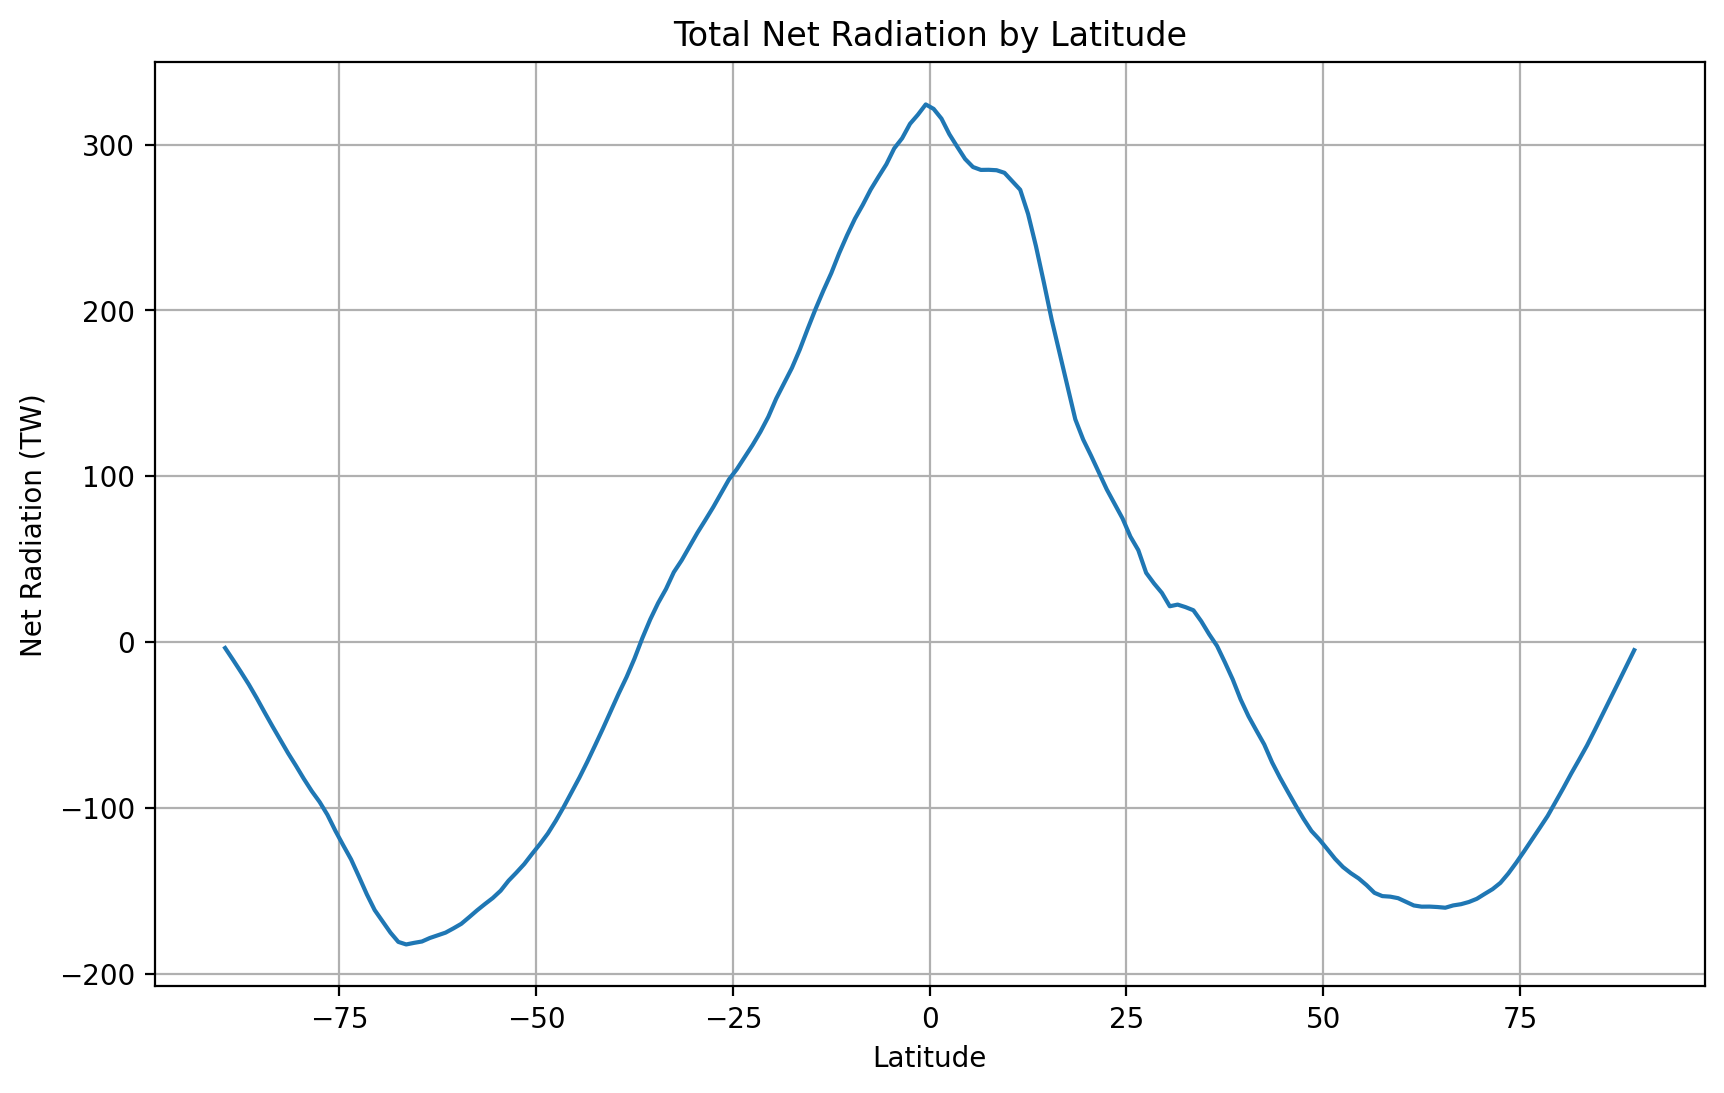

In [41]:


#do I need to create an array?


Total_net_rad = ds_time_mean.toa_net_all_mon * pixel_areas * 1e6

radiation_by_lat = Total_net_rad.sum(dim='lon')

plt.figure(figsize=(10, 6))
plt.plot(ds_time_mean.lat, radiation_by_lat/1e12)  # convert to TW
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (TW)')
plt.title('Total Net Radiation by Latitude')
plt.show()

### 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

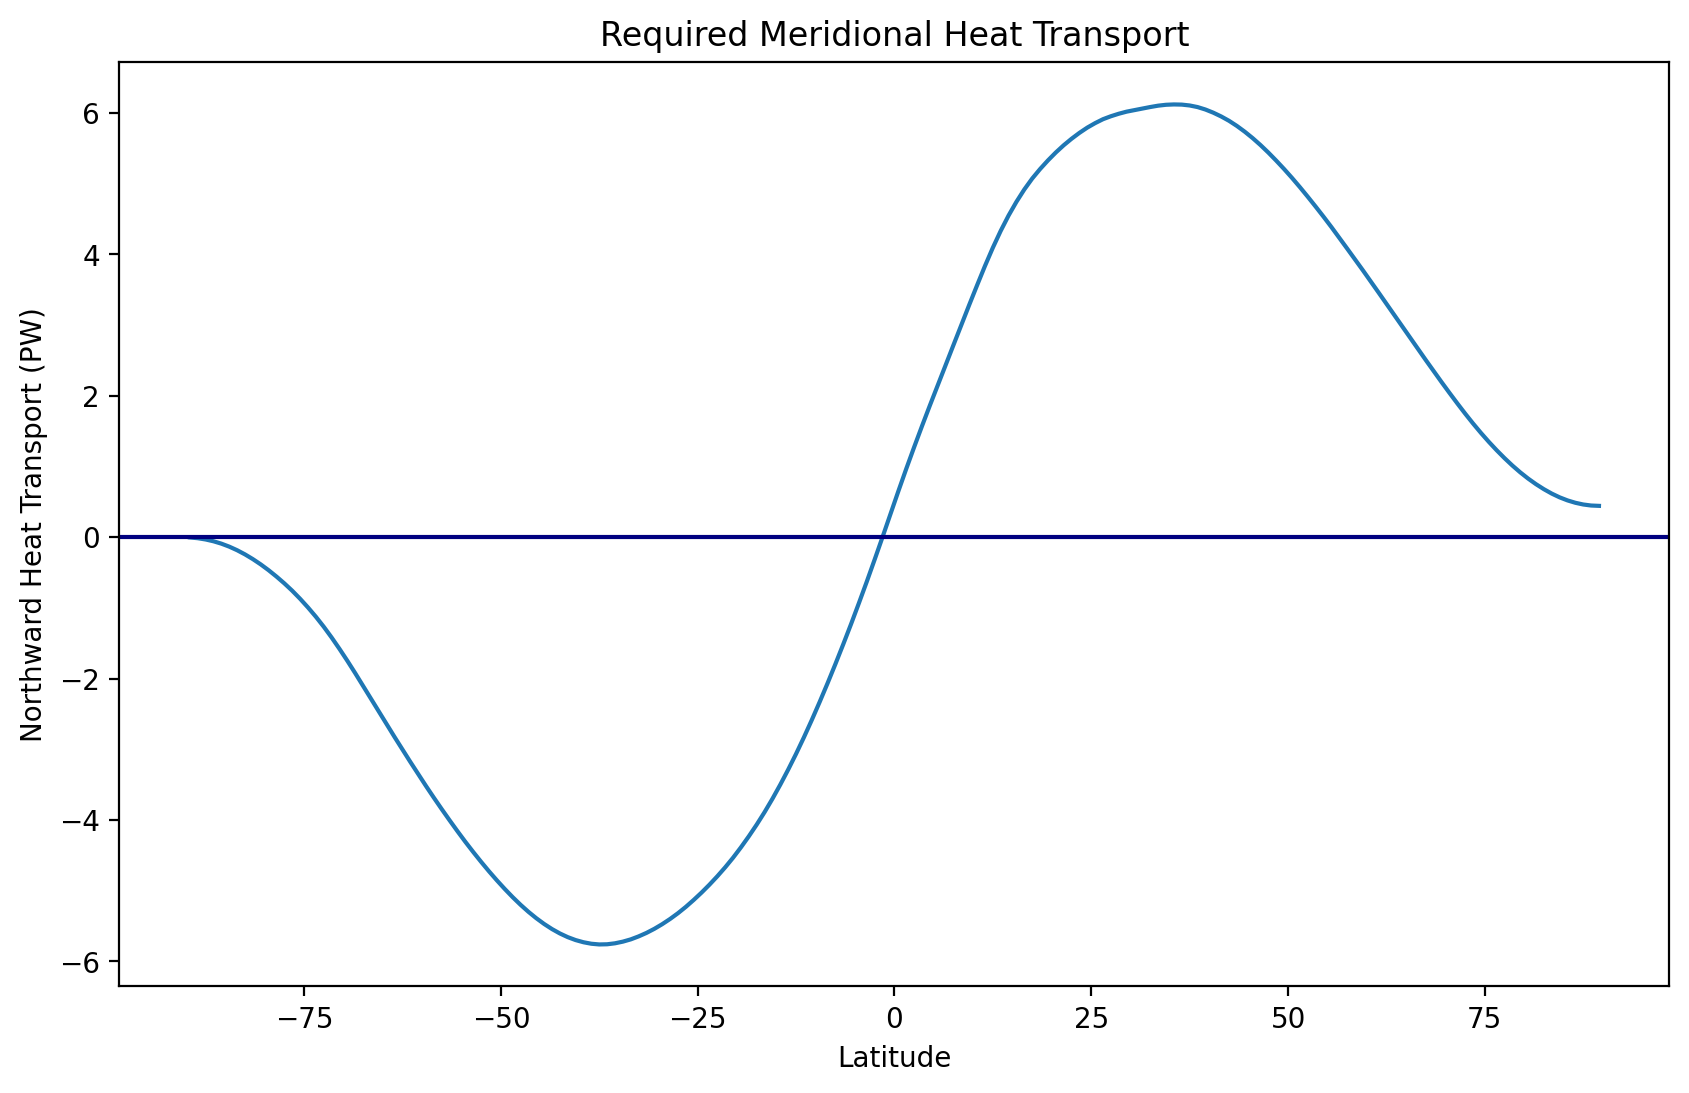

In [42]:
cumulative_transport = radiation_by_lat.cumsum(dim='lat')

plt.figure(figsize=(10, 6))
plt.plot(ds_time_mean.lat, cumulative_transport/1e15)  # Convert to PW (petawatts)
plt.xlabel('Latitude')
plt.ylabel('Northward Heat Transport (PW)')
plt.title('Required Meridional Heat Transport')
plt.axhline(y=0, color='navy', linestyle='-')
plt.show()

## 5) Selecting and Merging Data

For the next problem, use the following approximate locations of four different cities.

| city | lon | lat |
| -- | -- | -- |
| NYC |74 W | 40 N | 
| Nome, Alaska | 165 W | 64 N | 
| Columbo, Sri Lanka | 80 E | 7 N |
| Hobart, Tasmania | 147 E | 43 S |


### 5.1) Create a `Dataset` for each point from the global dataset
Each city should get its own `Dataset` with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

In [43]:
cities = {
    'NYC': {'lat': 40, 'lon': -74},  
    'Nome': {'lat': 64, 'lon': -165},   
    'Colombo': {'lat': 7, 'lon': 80}, 
    'Hobart': {'lat': -43, 'lon': 147}   
}

nyc_ds = dataset.sel(lat=cities['NYC']['lat'], lon=cities['NYC']['lon'], method='nearest')
print("\nNYC Dataset:", nyc_ds)

nome_ds = dataset.sel(lat=cities['Nome']['lat'], lon=cities['Nome']['lon'], method='nearest')
print("\nNome Dataset:", nome_ds)

colombo_ds = dataset.sel(lat=cities['Colombo']['lat'], lon=cities['Colombo']['lon'], method='nearest')
print("\nColombo Dataset:", colombo_ds)

hobart_ds = dataset.sel(lat=cities['Hobart']['lat'], lon=cities['Hobart']['lon'], method='nearest')
print("\nHobart Dataset:", hobart_ds)


NYC Dataset: <xarray.Dataset> Size: 8kB
Dimensions:          (time: 183)
Coordinates:
    lat              float32 4B 40.5
    lon              float32 4B 0.5
  * time             (time) float32 732B 482.5 483.5 484.5 ... 662.5 663.5 664.5
Data variables:
    solar_mon        (time) float32 732B 321.2 401.6 458.8 ... 319.5 400.2 458.1
    toa_cre_lw_mon   (time) float32 732B 21.34 29.62 34.75 ... 42.62 28.01 24.89
    toa_cre_net_mon  (time) float32 732B -17.28 -48.66 -35.71 ... -20.06 -23.43
    toa_cre_sw_mon   (time) float32 732B -38.63 -78.27 -70.46 ... -48.07 -48.32
    toa_lw_all_mon   (time) float32 732B 240.4 227.1 241.1 ... 220.6 237.5 249.9
    toa_lw_clr_mon   (time) float32 732B 261.8 256.7 275.8 ... 263.3 265.5 274.8
    toa_net_all_mon  (time) float32 732B -6.298 54.39 97.22 ... 61.24 105.8
    toa_net_clr_mon  (time) float32 732B 10.98 103.0 132.9 ... 16.52 81.31 129.2
    toa_sw_all_mon   (time) float32 732B 87.07 120.1 120.5 ... 104.7 101.5 102.3
    toa_sw_clr_mon   

In [17]:
#Find the nearest associated incoming solar radiation and net radiation timeseries at each city.
print("For NYC:")
print("Nearest point to NYC: ", str(float(nyc_ds.lat.values)), "N, ", str(abs(float(nyc_ds.lon.values))), "W")
print("Time period:", "from", nyc_ds.time[0].values, "to", nyc_ds.time[-1].values)
print("————————————————————————————")

print("For Nome, Alaska:")
print("Nearest point to Nome, Alaska: ", str(float(nome_ds.lat.values)), "N, ", str(abs(float(nome_ds.lon.values))), "W")
print("Time period:", "from", nome_ds.time[0].values, "to", nome_ds.time[-1].values)
print("————————————————————————————")

print("For Columbo, Sri Lanka:")
print("Nearest point to Columbo, Sri Lanka: ", str(float(colombo_ds.lat.values)), "N, ", str(abs(float(colombo_ds.lon.values))), "W")
print("Time period:", "from", colombo_ds.time[0].values, "to", colombo_ds.time[-1].values)
print("————————————————————————————")

print("For Hobart, Tasmania:")
print("Nearest point to Hobart, Tasmania: ", str(float(hobart_ds.lat.values)), "N, ", str(abs(float(hobart_ds.lon.values))), "W")
print("Time period:", "from", hobart_ds.time[0].values, "to", hobart_ds.time[-1].values)


For NYC:
Nearest point to NYC:  40.5 N,  0.5 W
Time period: from 482.5 to 664.5
————————————————————————————
For Nome, Alaska:
Nearest point to Nome, Alaska:  64.5 N,  0.5 W
Time period: from 482.5 to 664.5
————————————————————————————
For Columbo, Sri Lanka:
Nearest point to Columbo, Sri Lanka:  7.5 N,  80.5 W
Time period: from 482.5 to 664.5
————————————————————————————
For Hobart, Tasmania:
Nearest point to Hobart, Tasmania:  -42.5 N,  147.5 W
Time period: from 482.5 to 664.5


### 5.2) Merge these four datasets into a new dataset with the new dimension `city`

Create a new dimension coordinate to hold the city name.
Display the merged dataset.

In [18]:
datasets = [
    nyc_ds.assign_coords(city='NYC'),
    nome_ds.assign_coords(city='Nome'),
    colombo_ds.assign_coords(city='Colombo'),
    hobart_ds.assign_coords(city='Hobart')
]

# Merge the datasets along the new 'city' dimension
merged_ds = xr.concat(datasets, dim='city')

In [19]:
merged_ds

<xarray.Dataset> Size: 30kB
Dimensions:          (city: 4, time: 183)
Coordinates:
    lat              (city) float32 16B 40.5 64.5 7.5 -42.5
    lon              (city) float32 16B 0.5 0.5 80.5 147.5
  * time             (time) float32 732B 482.5 483.5 484.5 ... 662.5 663.5 664.5
  * city             (city) <U7 112B 'NYC' 'Nome' 'Colombo' 'Hobart'
Data variables:
    solar_mon        (city, time) float32 3kB 321.2 401.6 458.8 ... 238.5 165.0
    toa_cre_lw_mon   (city, time) float32 3kB 21.34 29.62 34.75 ... 13.83 25.53
    toa_cre_net_mon  (city, time) float32 3kB -17.28 -48.66 ... -24.94 -2.651
    toa_cre_sw_mon   (city, time) float32 3kB -38.63 -78.27 ... -38.76 -28.18
    toa_lw_all_mon   (city, time) float32 3kB 240.4 227.1 241.1 ... 237.6 231.8
    toa_lw_clr_mon   (city, time) float32 3kB 261.8 256.7 275.8 ... 251.4 257.3
    toa_net_all_mon  (city, time) float32 3kB -6.298 54.39 ... -75.59 -123.6
    toa_net_clr_mon  (city, time) float32 3kB 10.98 103.0 ... -50.65 -120.9
    toa_sw_all_mon   (city, time) float32 3kB 87.07 120.1 120.5 ... 76.46 56.79
    toa_sw_clr_mon   (city, time) float32 3kB 48.44 41.8 50.03 ... 37.69 28.62
Attributes:
    references:   Loeb_etal2009
    version:      This is version 2.8: August 21, 2015
    comment:      Data is from East to West and South to North. Climatology f...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    description:  Edition 2.8
    Fill_Value:   Fill Value is -999.0

### 5.3) Plot the incoming solar and net radiation at each city

Make two separate plots.
Try to have your legend created automatically from the data.

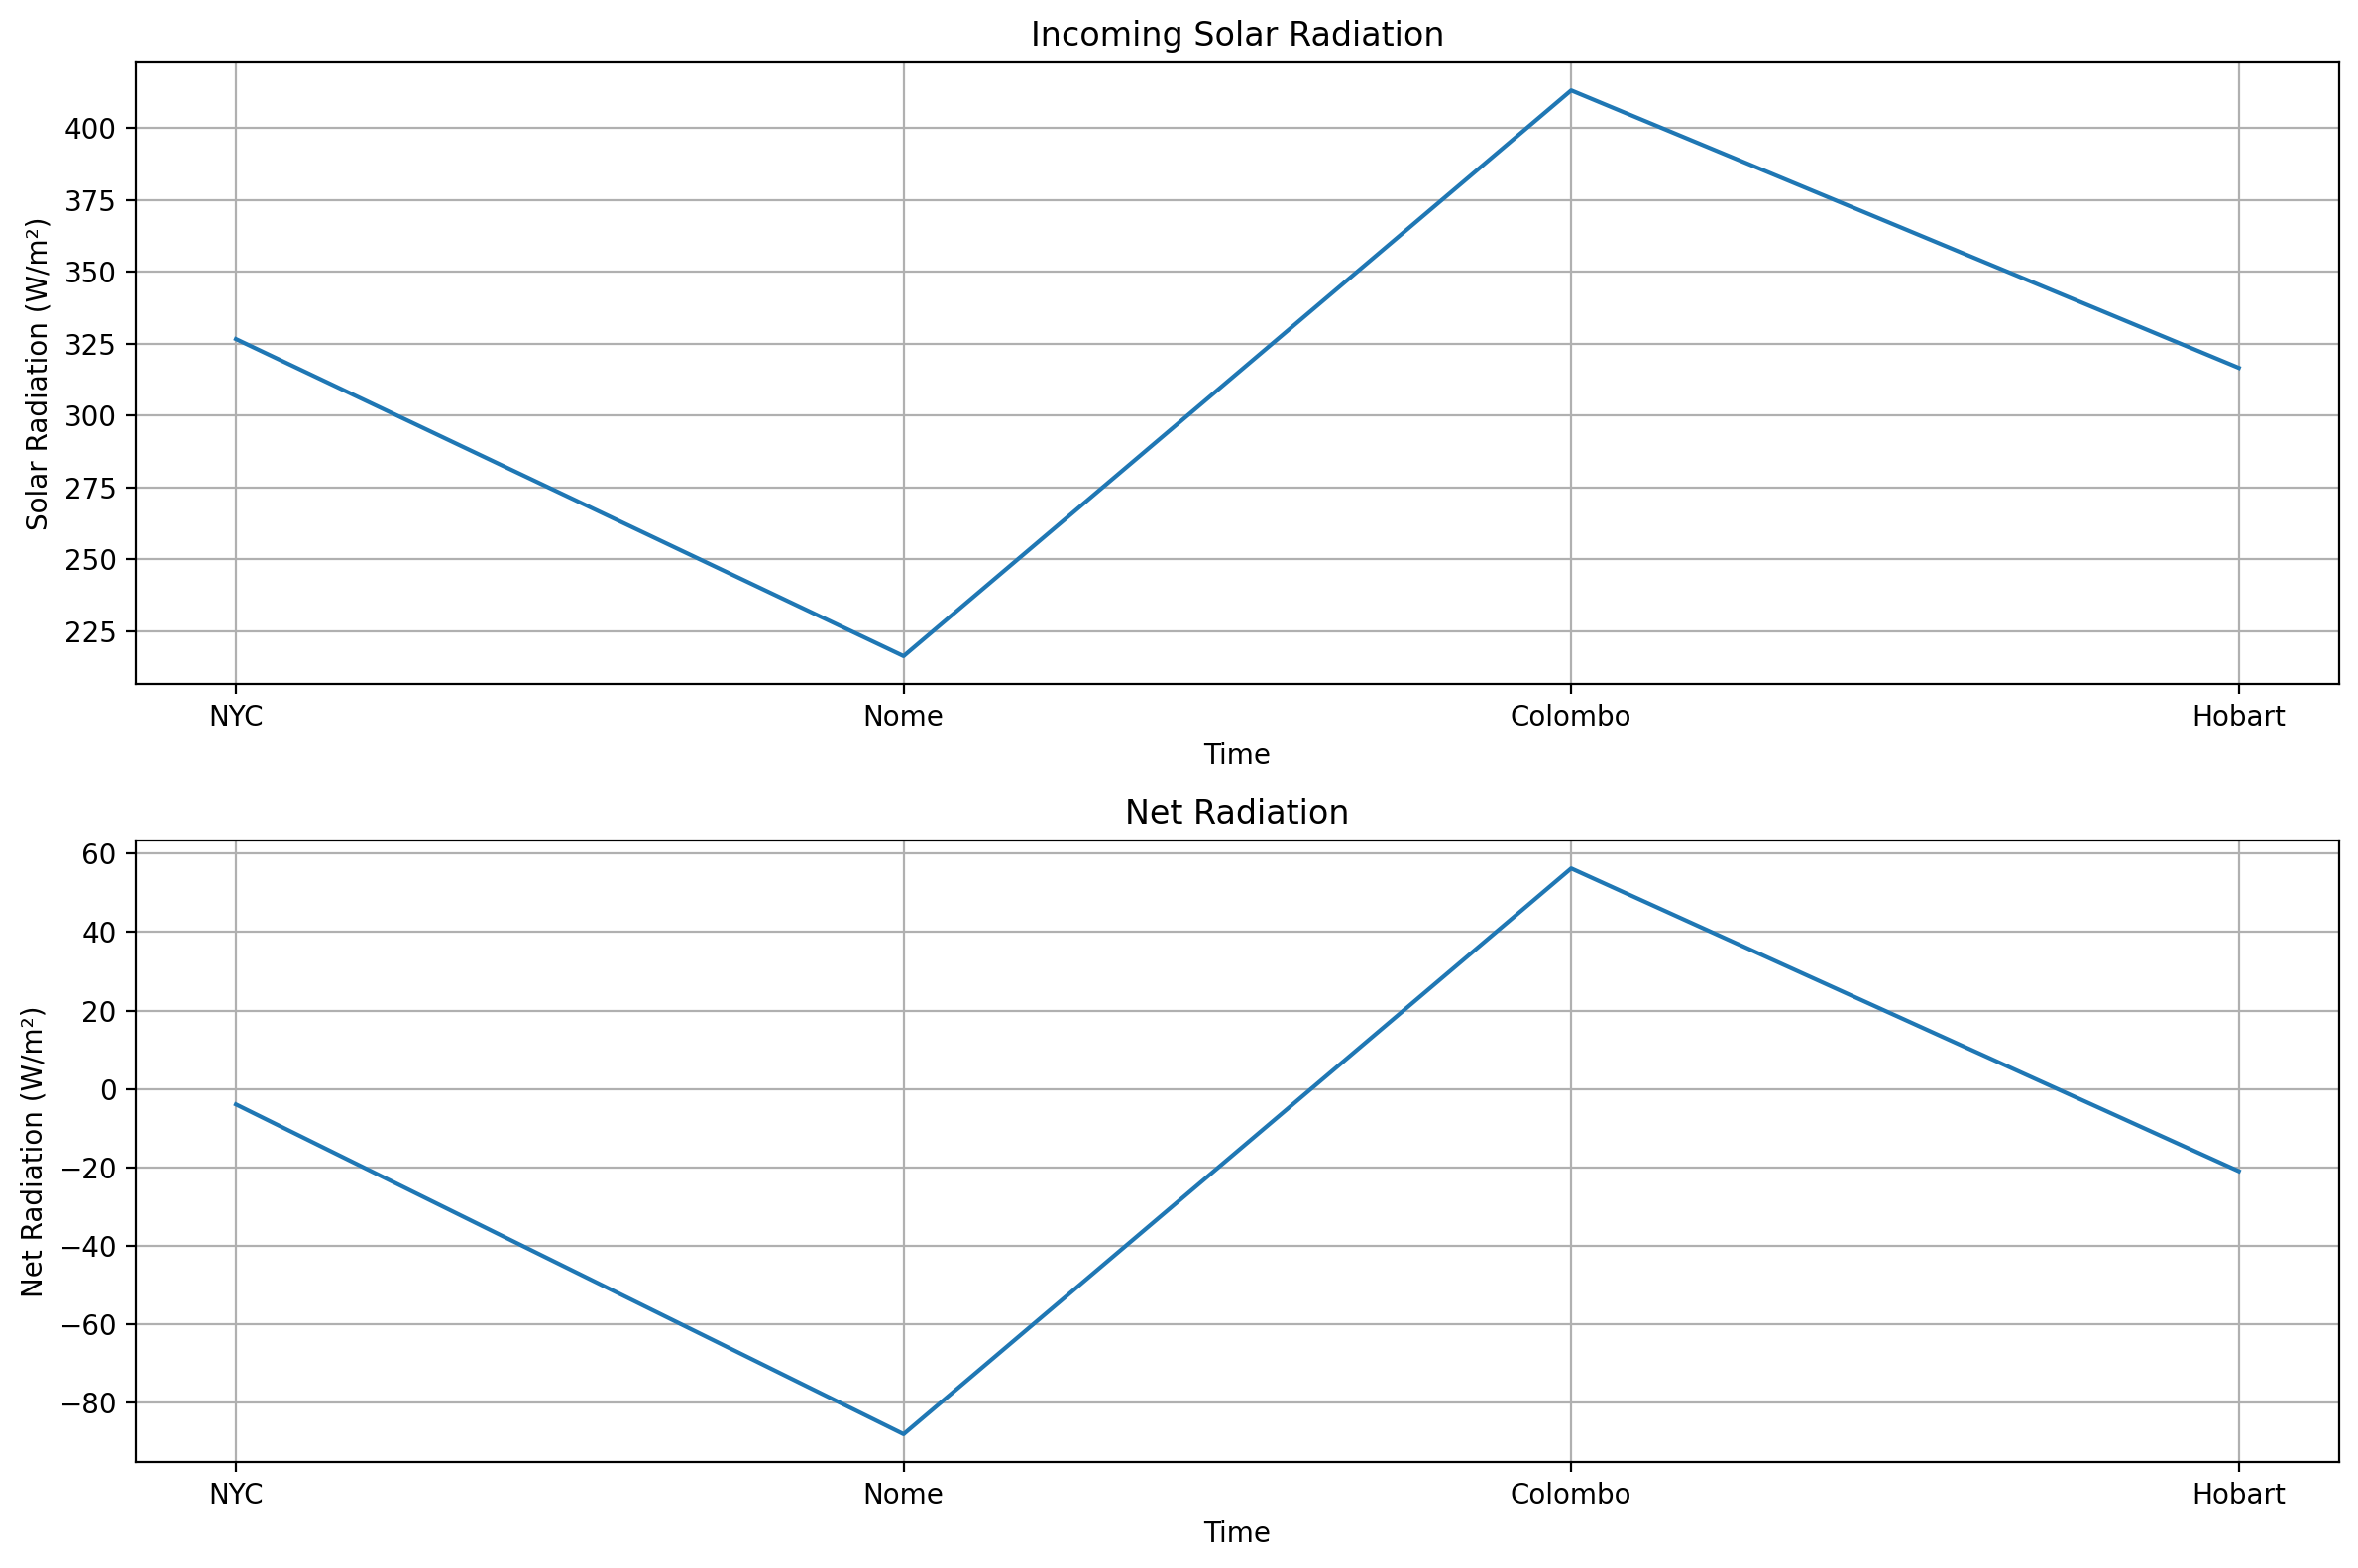

In [140]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

merged_ds.solar_mon.plot.line(ax=ax1, hue='city')
ax1.set_title('Incoming Solar Radiation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Solar Radiation (W/m²)')
ax1.grid(True)


merged_ds.toa_net_all_mon.plot.line(ax=ax2, hue='city')
ax2.set_title('Net Radiation')
ax2.set_xlabel('Time')
ax2.set_ylabel('Net Radiation (W/m²)')
ax2.grid(True)
plt.tight_layout()
plt.show()